# Todos
* Check mTurk exclusion criterion and update here in the code when finding chance-performers (25?)
* Save preprocessed all_data in separate notebook (takes forever otherwise)

# Imports etc.

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

In [2]:
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
incl_data = all_data.loc[np.invert(all_data.chance_performer)]
all_data

,action_id,action_name,block,correct,goal_star,goal_star_name,internal_node_id,key_press,middle_item,middle_item_name,...,bool_middle_item_lowTransferRules,bool_unlocked_star_highRules,bool_unlocked_star_highTransferRules,bool_middle_item_lowRulesBoth,bool_middle_item_lowRulesLearnOnly,bool_middle_item_lowRulesTransferOnly,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,chance_performer
0,2,I,0,NaN,NaN,NaN,0.0-17.0-0.0,73.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,True
1,0,U,0,NaN,NaN,NaN,0.0-17.0-1.0,85.0,-1.0,NaN,...,0,0,0,0,0,0,0,0,0,True
2,2,I,0,NaN,NaN,NaN,0.0-17.0-2.0,73.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,True
3,1,P,0,NaN,3.0,0.0,0.0-17.0-3.0,80.0,-1.0,NaN,...,0,0,0,0,0,0,0,0,0,True
4,0,U,0,NaN,NaN,NaN,0.0-18.0-0.0,85.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19699,3,W,6,True,1.0,1.0,0.0-1032.0-3.0,87.0,1.0,0.0,...,0,0,1,1,0,0,0,0,1,False
19700,1,R,6,NaN,NaN,NaN,0.0-1033.0-0.0,82.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,False
19701,2,E,6,NaN,NaN,NaN,0.0-1033.0-1.0,69.0,2.0,2.0,...,0,0,0,1,0,0,0,0,0,False
19702,2,E,6,NaN,NaN,NaN,0.0-1033.0-2.0,69.0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,False


# Results

## Data overview

In [5]:
interesting_cols = [
    'rt', 'trial_type', 'phase', 'block', 'trial', 'trial_', 'subtrial', 'points', #'key_press',
    'action_id', 'middle_item_name', 'goal_star_name', 'goal_star', 'correct', 'unlocked_star', #'middle_item',
    'unlocked_star_name', 'timeout', #'action_name',
    'middle_item_lowTransferRules', 'middle_item_lowRules', 'bool_middle_item_lowRules',
    'unlocked_star_highTransferRules', 'unlocked_star_highRules', 'bool_unlocked_star_highRules',
    'chance_performer',
]

In [6]:
id_cols = ['sid', 'trial_type', 'phase']
all_data[interesting_cols + id_cols].groupby(id_cols[0]).mean()

,rt,block,trial,trial_,subtrial,points,action_id,middle_item_name,goal_star_name,goal_star,unlocked_star,unlocked_star_name,middle_item_lowTransferRules,middle_item_lowRules,bool_middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules,bool_unlocked_star_highRules,chance_performer
sid,,,,,,,,,,,,,,,,,,,
0,236.062123,5.761194,11.966418,155.996269,1.484142,0.000000,1.496269,0.227273,1.378788,1.416667,-0.996212,-0.988636,1.594059,0.227273,0.082090,NaN,2.000000,0.000933,True
1,376.155199,5.023787,12.096099,137.690771,1.474786,0.000000,1.455756,1.181818,1.655039,1.341085,-0.996124,-0.988372,NaN,1.181818,0.041865,1.500000,2.000000,0.000951,True
2,192.550253,4.718459,12.057668,130.019139,1.496097,88.718711,1.492571,1.267001,1.508081,1.491919,-0.119192,1.990909,1.986239,1.263476,0.457819,3.000000,2.483607,0.215059,False
3,403.321016,5.588737,11.959044,151.677474,1.487201,2.290956,1.575939,1.505263,1.493103,1.524138,-0.927586,-0.958621,1.009901,1.505263,0.081058,NaN,0.333333,0.007679,True
4,140.097583,5.791923,12.125549,156.923617,1.472344,0.000000,1.482880,0.957219,1.541219,1.469534,-0.903226,-0.928315,NaN,0.957219,0.164179,1.000000,1.000000,0.008780,True
5,353.886932,5.610497,12.006446,152.268877,1.490792,0.000000,1.472376,1.119048,1.475836,1.386617,-0.962825,-0.962825,NaN,NaN,0.000000,NaN,NaN,0.000000,True
6,435.994964,4.714896,12.005024,129.877418,1.497362,191.630746,1.468726,1.505030,1.302115,1.503525,0.245720,0.492447,1.454545,1.353725,0.320271,2.004831,1.794872,0.117558,False
7,406.903453,5.561847,12.061847,151.108014,1.472997,0.385017,1.252613,0.799020,1.525000,1.475000,-0.917857,-0.707143,NaN,0.796020,0.175087,2.809524,2.904762,0.018293,True
8,275.313791,5.513784,11.992481,149.837093,1.498747,5.451128,1.540518,1.592233,1.505017,1.505017,-0.732441,-0.719064,1.136508,1.592233,0.172097,NaN,0.076923,0.065163,True


In [7]:
all_data[interesting_cols].describe()

,rt,block,trial,trial_,subtrial,points,action_id,middle_item_name,goal_star_name,goal_star,unlocked_star,unlocked_star_name,middle_item_lowTransferRules,middle_item_lowRules,bool_middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules,bool_unlocked_star_highRules
count,19587.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,19704.000000,5598.000000,4892.000000,4892.000000,4892.000000,4892.000000,2917.000000,5127.000000,19704.000000,852.000000,1720.000000,19704.000000
mean,306.476086,5.036845,12.025325,137.946458,1.491575,73.872107,1.483963,1.317256,1.497956,1.475470,-0.377760,0.133074,1.549194,1.269553,0.260201,2.326291,1.949419,0.087292
std,320.723604,3.312339,7.214446,83.105614,1.119845,102.855748,1.124466,1.083486,1.098034,1.005613,0.968519,1.574457,1.137976,1.080588,0.438755,1.056173,1.104383,0.282270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,2.000000,6.000000,68.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,214.365000,5.000000,12.000000,134.000000,1.000000,26.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000
75%,342.175000,8.000000,18.000000,202.000000,2.000000,119.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000,2.000000,1.000000,3.000000,3.000000,0.000000
max,2496.535000,11.000000,24.000000,299.000000,3.000000,487.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000


In [8]:
all_data.loc[:30, interesting_cols]

,rt,trial_type,phase,block,trial,trial_,subtrial,points,action_id,middle_item_name,...,unlocked_star,unlocked_star_name,timeout,middle_item_lowTransferRules,middle_item_lowRules,bool_middle_item_lowRules,unlocked_star_highTransferRules,unlocked_star_highRules,bool_unlocked_star_highRules,chance_performer
0,2263.780,learning,low,0,0,0,0,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,True
1,28.155,learning,low,0,0,0,1,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,True
2,242.760,learning,low,0,0,0,2,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,True
3,236.630,learning,low,0,0,0,3,0,1,NaN,...,-1.0,-1.0,NaN,NaN,NaN,0,NaN,NaN,0,True
4,970.630,learning,low,0,1,1,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,True
5,109.190,learning,low,0,1,1,1,0,2,NaN,...,NaN,NaN,NaN,3.0,NaN,0,NaN,NaN,0,True
6,260.995,learning,low,0,1,1,2,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,True
7,388.665,learning,low,0,1,1,3,0,3,NaN,...,-1.0,-1.0,NaN,NaN,NaN,0,NaN,NaN,0,True
8,620.475,learning,low,0,2,2,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0,True
9,157.430,learning,low,0,2,2,1,0,2,NaN,...,NaN,NaN,NaN,3.0,NaN,0,NaN,NaN,0,True


## Task Duration

Durations: [17. 14. 27. 13.  9. 19. 44. 14. 11. 32.]


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\0_TaskDuration_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


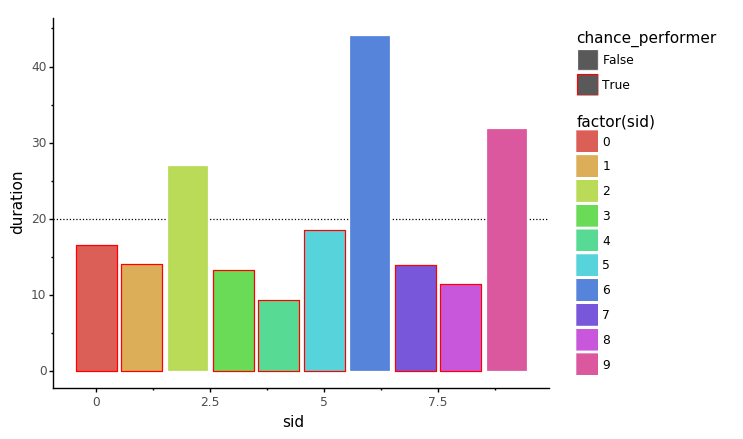

<ggplot: (-9223371931200032466)>


In [9]:
dur_dat = all_data.groupby(['sid', 'chance_performer']).aggregate('mean').reset_index()
print("Durations: {}".format(dur_dat['duration'].values.round()))

g = (gg.ggplot(dur_dat, gg.aes('sid', 'duration', fill='factor(sid)', color='chance_performer'))
     + gg.geom_hline(yintercept=np.mean(dur_dat['duration']), linetype='dotted')
     + gg.scale_color_manual(values=('white', 'red'))
     + gg.geom_bar(stat='identity')
#      + gg.theme(legend_position='none')
    )
g.save(os.path.join(plot_dir, '0_TaskDuration_all.png'))
print(g)

## Raw button presses

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 4 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\0_RawKeyPresses.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


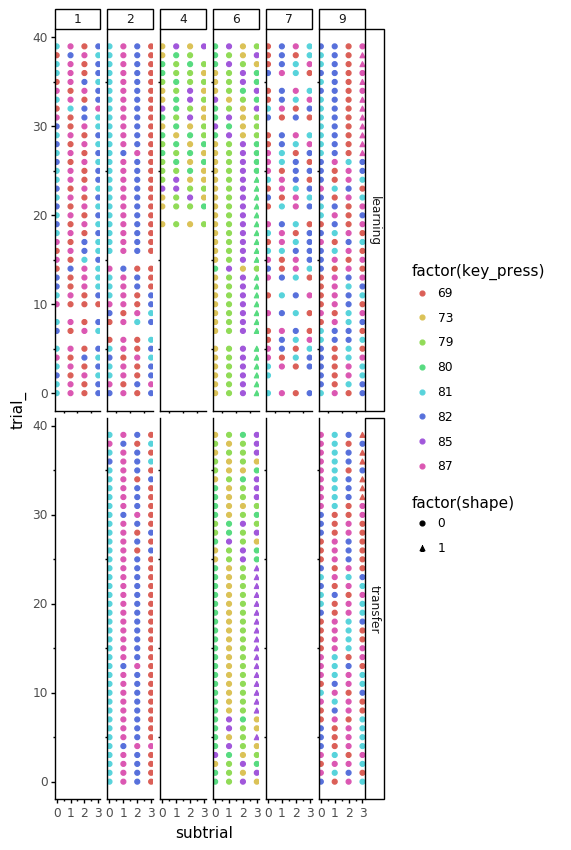

<ggplot: (-9223371931200824302)>


In [10]:
# Get data
sub_dat = all_data.loc[
    (all_data.phase == 'high')
    & (all_data.trial_ < 40) #& np.invert(np.isnan(all_data.key_press))
]
sub_dat['shape'] = sub_dat['acc'].apply(lambda x: 0 if np.isnan(x) or x == 0 else 1)

# Plot
gg.options.figure_size = (4, 10)
g = (gg.ggplot(sub_dat, gg.aes('subtrial', 'trial_', color='factor(key_press)', shape='factor(shape)'))
     + gg.geom_point()
     + gg.facet_grid('trial_type ~ sid', scales='free_x')
    )
g.save(os.path.join(plot_dir, '0_RawKeyPresses.png'))
print(g)
gg.options.figure_size = (6.4, 4.8)  # Reset default figure size

## Points won over time

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\0_PointsOverTrials.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\0_PointsOverTrials_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


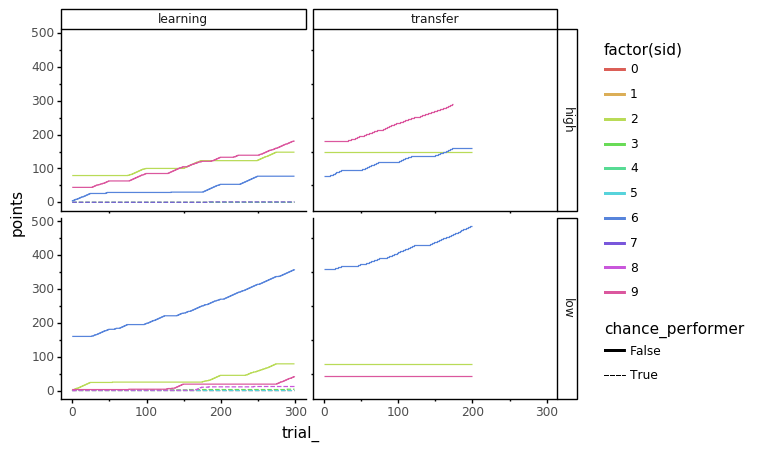

<ggplot: (-9223371931199143445)>

In [11]:
def plot_PointsOverTrials(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial_', 'points', color='factor(sid)', linetype='chance_performer'))
         + gg.geom_line()
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '0_PointsOverTrials{}.png'.format(suf)))
    
    return g

# Use
plot_PointsOverTrials(incl_data)
plot_PointsOverTrials(all_data, '_all')

## Response times

### Population-wide

In [12]:
# Prepare data
id_cols = ['sid', 'phase', 'trial_type']
rt_sum_dat_subtrial = incl_data.groupby(id_cols + ['subtrial']).aggregate('mean').reset_index()[id_cols + ['subtrial', 'rt']]
rt_sum_dat = incl_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['rt', 'acc']]
rt_sum_dat = rt_sum_dat.rename(columns={'rt': 'mean_rt'})

rt_sum = pd.merge(rt_sum_dat, rt_sum_dat_subtrial, on=id_cols)
rt_sum['rt_delta'] = rt_sum['rt'] - rt_sum['mean_rt']
rt_sum

,sid,phase,trial_type,mean_rt,acc,subtrial,rt,rt_delta
0,2,high,learning,167.710438,0.232323,0,264.952862,97.242424
1,2,high,learning,167.710438,0.232323,1,147.158249,-20.552189
2,2,high,learning,167.710438,0.232323,2,113.575758,-54.134680
3,2,high,learning,167.710438,0.232323,3,145.154882,-22.555556
4,2,high,transfer,154.183750,0.000000,0,237.935000,83.751250
5,2,high,transfer,154.183750,0.000000,1,136.735000,-17.448750
6,2,high,transfer,154.183750,0.000000,2,115.265000,-38.918750
7,2,high,transfer,154.183750,0.000000,3,126.800000,-27.383750
8,2,low,learning,229.185123,0.266892,0,339.290541,110.105418
9,2,low,learning,229.185123,0.266892,1,244.195946,15.010823


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\1_RTOverSubtrial.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


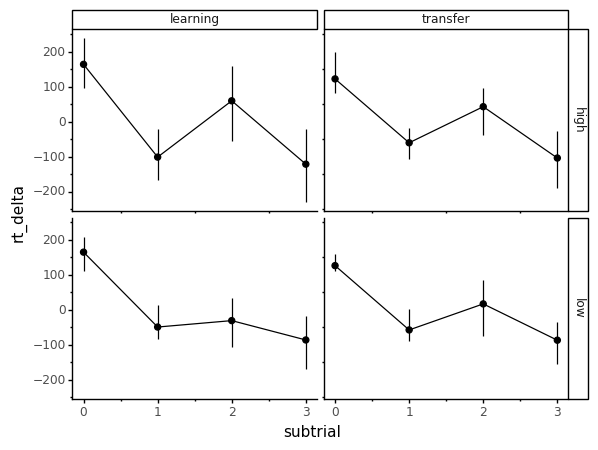

<ggplot: (-9223371931198398983)>


In [13]:
# Plot
g = (gg.ggplot(rt_sum, gg.aes('subtrial', 'rt_delta'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase ~ trial_type')
)
g.save(os.path.join(plot_dir, '1_RTOverSubtrial.png'))
print(g)

### Individuals

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\1_RTOverSubtrial_Details_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 117 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\1_RTOverSubtrial_

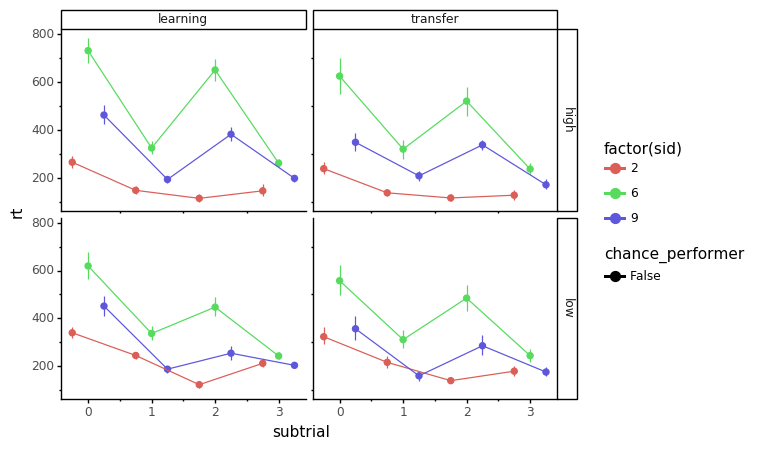

<ggplot: (-9223371931200724911)>

In [14]:
def plot_RTOverSubtrialDetails(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('subtrial', 'rt', color='factor(sid)', group='sid', linetype='chance_performer'))
         + gg.stat_summary(position=gg.position_dodge(width=0.75))
         + gg.stat_summary(position=gg.position_dodge(width=0.75), geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '1_RTOverSubtrial_Details{}.png'.format(suf)))
    
    return g

# Use
rts_all = plot_RTOverSubtrialDetails(all_data, '_all')
plot_RTOverSubtrialDetails(incl_data)

## Learning curves

### Individual participants

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_Trial_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 14812 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_Trial.

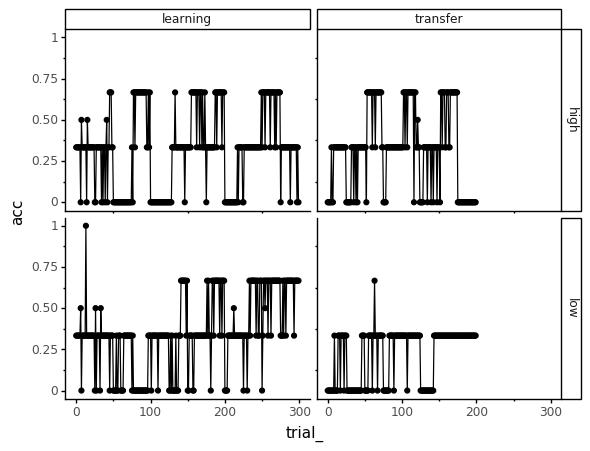

<ggplot: (105654088119)>

In [15]:
# Learning curves, averaging over goal stars 
def plot_LearnCurves_Trial(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial_', 'acc'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '2_LearnCurves_Trial{}.png'.format(suf)))
    
    return g

# Use
learn_curves_all = plot_LearnCurves_Trial(all_data, '_all')
learn_curves = plot_LearnCurves_Trial(incl_data)
learn_curves

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_Block.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 8886 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 8886 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


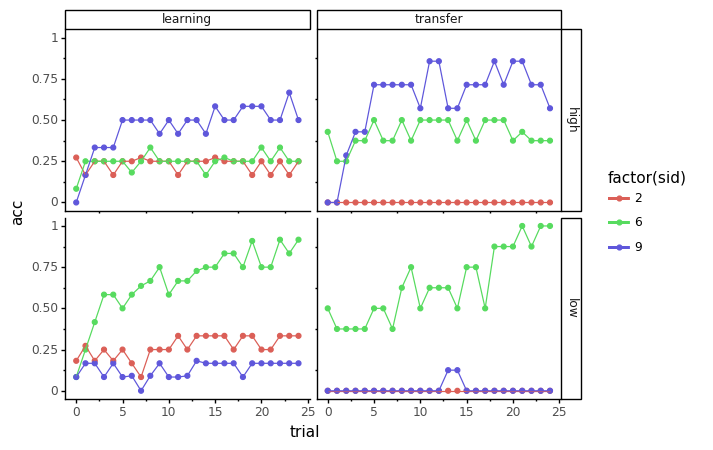

<ggplot: (105653763746)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_Block_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 14812 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


In [16]:
# Learning curves, trial-by-trial
learn_curves2 = learn_curves + gg.aes(x='trial', color='factor(sid)')
learn_curves2.save(os.path.join(plot_dir, '2_LearnCurves_Block.png'))
print(learn_curves2)

learn_curves_all2 = learn_curves_all + gg.aes(x='trial', color='factor(sid)')
learn_curves_all2.save(os.path.join(plot_dir, '2_LearnCurves_Block_all.png'))

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_Star.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 8886 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 8886 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


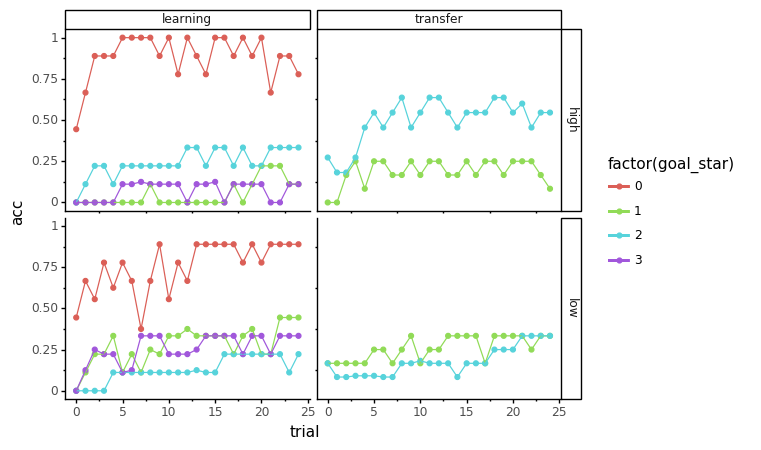

<ggplot: (-9223371931198400638)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_Star_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_summary : Removed 14812 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


In [17]:
# Learning curves, trial-by-trial
learn_curves3 = learn_curves + gg.aes(x='trial', color='factor(goal_star)')
learn_curves3.save(os.path.join(plot_dir, '2_LearnCurves_Star.png'))
print(learn_curves3)

learn_curves_all3 = learn_curves_all + gg.aes(x='trial', color='factor(goal_star)')
learn_curves_all3.save(os.path.join(plot_dir, '2_LearnCurves_Star_all.png'))

### Population average

In [18]:
id_cols = ['sid', 'trial_type', 'phase', 'trial']
learn_curves_sum = incl_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['acc']]
learn_curves_sum

,sid,trial_type,phase,trial,acc
0,2,learning,high,0,0.272727
1,2,learning,high,1,0.166667
2,2,learning,high,2,0.250000
3,2,learning,high,3,0.250000
4,2,learning,high,4,0.166667
...,...,...,...,...,...
295,9,transfer,low,20,0.000000
296,9,transfer,low,21,0.000000
297,9,transfer,low,22,0.000000
298,9,transfer,low,23,0.000000


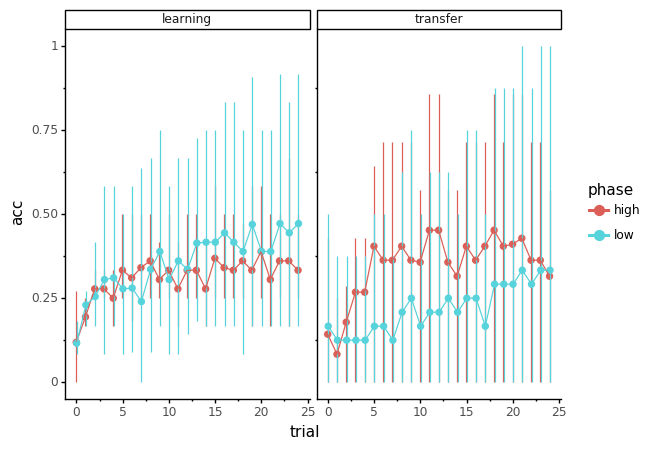

<ggplot: (-9223371931200032347)>


C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\2_LearnCurves_BlockAvg.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [19]:
g = (gg.ggplot(learn_curves_sum, gg.aes('trial', 'acc', color='phase'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid(' ~ trial_type')
    )
print(g)
g.save(os.path.join(plot_dir, '2_LearnCurves_BlockAvg.png'))

## Performance by star

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\3_PerformanceByStar_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\3_PerformanceByStar.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


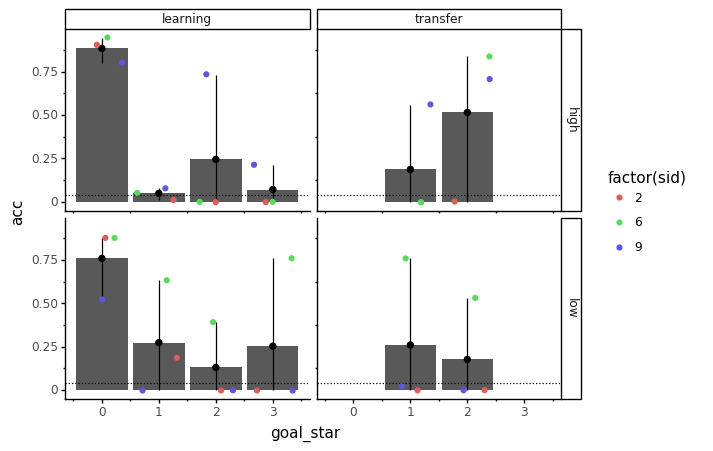

<ggplot: (-9223371931199128190)>

In [20]:
def plot_PerformanceByStar(dat, suf=''):
    
    id_cols = ['sid', 'phase', 'trial_type', 'goal_star']
    sum_dat = dat.groupby(id_cols).mean().reset_index()[id_cols + ['acc']]
    
    chance_perf = 1 / (4 * 3 * 2)
    g = (gg.ggplot(sum_dat, gg.aes('goal_star', 'acc'))
         + gg.stat_summary(geom='bar')
         + gg.stat_summary()
         + gg.geom_hline(yintercept=chance_perf, linetype='dotted')
         + gg.geom_point(gg.aes(color='factor(sid)'), position='jitter')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '3_PerformanceByStar{}.png'.format(suf)))
    
    return g

# Use
plot_PerformanceByStar(all_data, '_all')
plot_PerformanceByStar(incl_data)

## Collecting the wrong star

In [ ]:
def plot_CollectingWrongStar(dat, suf=''):
    
    # Get data
    id_cols = ['sid', 'phase', 'trial_type', 'unlocked_star']
    sub_dat = dat.loc[dat.correct == 0].reset_index()
    sum_dat = sub_dat.groupby(id_cols).count().reset_index()[id_cols + ['index']]
    sum_dat = sum_dat.rename(columns={'index': 'n_unlocked'})
    sum_dat.loc[np.isnan(sum_dat.n_unlocked), 'n_unlocked'] = 0
    
    # Plot
    g = (gg.ggplot(sum_dat, gg.aes('unlocked_star', 'n_unlocked'))
         + gg.stat_summary(geom='bar')
         + gg.stat_summary()
         + gg.geom_point(gg.aes(color='factor(sid)'), position='jitter')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '4_CollectingWrongStar{}.png'.format(suf)))
    
    return g

# Use
plot_CollectingWrongStar(all_data, '_all')
plot_CollectingWrongStar(incl_data)

## Perseverance: Following old rules after transfer

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\5_PerseveranceLowRules_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\5_PerseveranceLowRules.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


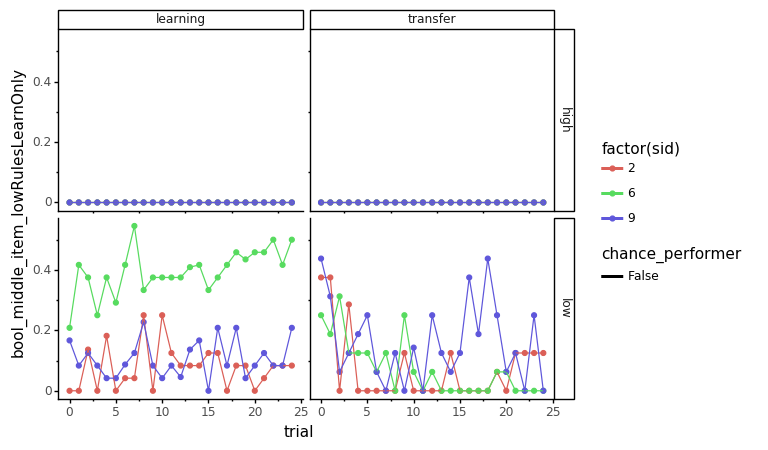

<ggplot: (-9223371931198453658)>

In [22]:
# How often do participants apply the low rules of the learning phase?
# -> Perseveration if they do it during low transfer (low rules don't work any more)!
# -> Confusion if they stop doing it during high transfer (low rules still work)!

def plot_PerseveraceLowRules(dat, suf=''):
    
    g = (gg.ggplot(dat, gg.aes('trial', 'bool_middle_item_lowRulesLearnOnly', color='factor(sid)', linetype='chance_performer'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '5_PerseveranceLowRules{}.png'.format(suf)))
    
    return g

# Use
sub_dat = all_data.loc[all_data.subtrial.isin([1, 3])]
pers_all = plot_PerseveraceLowRules(sub_dat, '_all')
pers = plot_PerseveraceLowRules(sub_dat.loc[np.invert(sub_dat['chance_performer'])])
pers

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\5_PerseveranceHighRules_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\5_PerseveranceHighRules.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


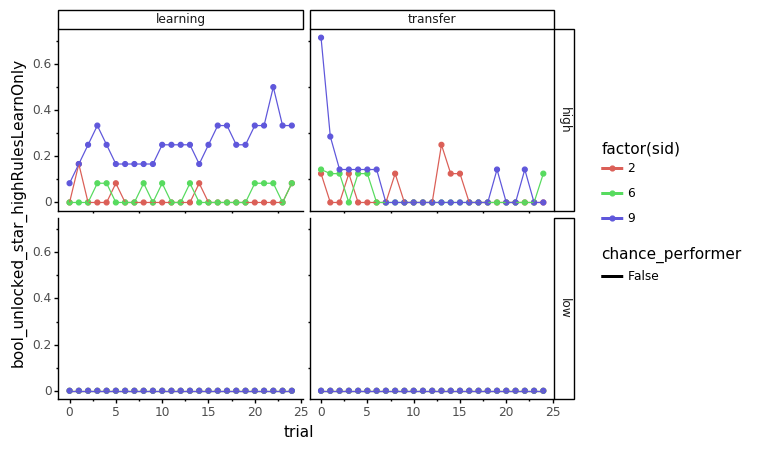

<ggplot: (105655657813)>


In [23]:
# How often do participants apply the high rules of the learning phase?
# -> Perseveration if they do it during high transfer (high rules don't work any more)!
# -> Relearning of middle-layer items if they increase during low transfer (same high rules, different low rules)!

pers_all2 = pers_all + gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
pers_all2.data = pers_all.data.loc[pers_all.data.subtrial == 3]
pers_all2.save(os.path.join(plot_dir, '5_PerseveranceHighRules_all.png'))

pers2 = pers + gg.aes(y='bool_unlocked_star_highRulesLearnOnly')
pers2.data = pers.data.loc[pers.data.subtrial == 3]
pers2.save(os.path.join(plot_dir, '5_PerseveranceHighRules.png'))
print(pers2)

## Analyzing performance by level

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\6_DetailsLowTransferRules_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\6_DetailsLowTransferRules.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


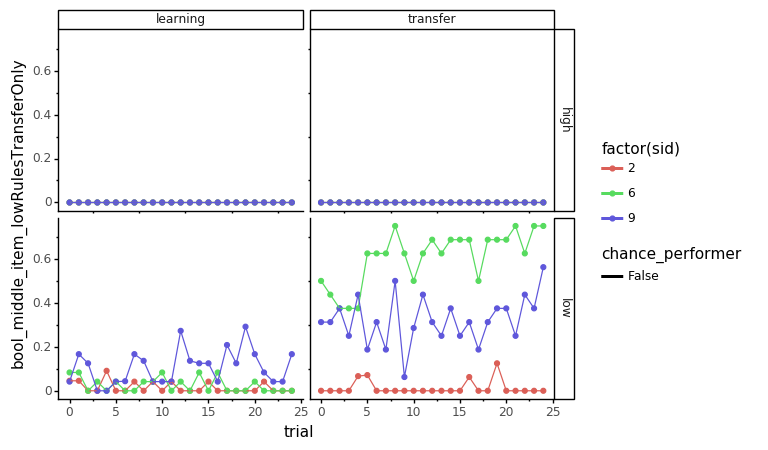

<ggplot: (-9223371931199137066)>

In [24]:
# More details analysis of performance for low-level rules
# No decline in high transfer phase -> low rules didn't change
# Decline and relearning in low transfer phase -> low rules changed
pers_all3 = pers_all + gg.aes(y='bool_middle_item_lowRulesTransferOnly')
pers_all3.save(os.path.join(plot_dir, '6_DetailsLowTransferRules_all.png'))

pers3 = pers + gg.aes(y='bool_middle_item_lowRulesTransferOnly')
pers3.save(os.path.join(plot_dir, '6_DetailsLowTransferRules.png'))
pers3

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\6_DetailsHighTransferRules_all.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\6_DetailsHighTransferRules.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


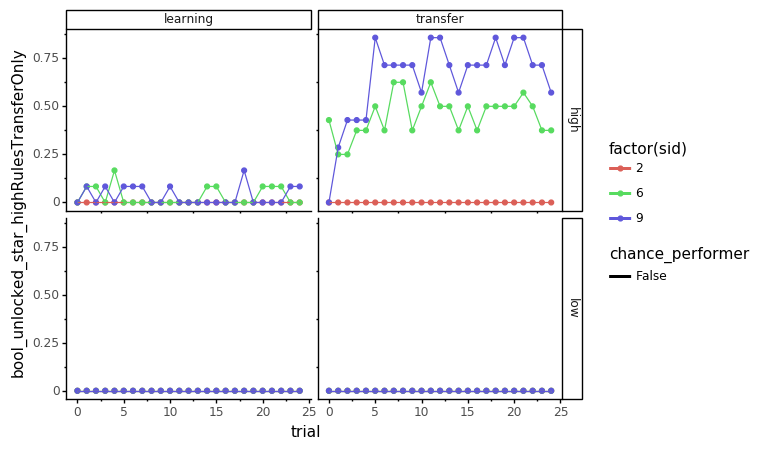

<ggplot: (-9223371931200883950)>

In [25]:
# More details analysis of performance for high-level rules
# Decline and relearning in high transfer phase -> high rules changed
# Decline and relearning in low transfer phase -> high rules are the same, but low-level components changed
pers_all4 = pers_all2 + gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
pers_all4.save(os.path.join(plot_dir, '6_DetailsHighTransferRules_all.png'))

pers4 = pers2 + gg.aes(y='bool_unlocked_star_highRulesTransferOnly')
pers4.save(os.path.join(plot_dir, '6_DetailsHighTransferRules.png'))
pers4

## Time frame for learning low / high rules

In [ ]:
# How fast are low rules learnt? How many middle-items are produced through learning?
def plot_TimeframeLearnRules(dat, suf):
    
    # Get data
    if 'Low' in suf:
        sub_dat = dat.loc[dat['subtrial'].isin([1, 3])]  # Select subtrials 1 and 3, in which middle-items *can* appear
        y = 'bool_middle_item_lowRules'
        if 'Trans' in suf:
            y = 'bool_middle_item_lowTransferRules'

    elif 'High' in suf:
        sub_dat = all_data.loc[all_data['subtrial'] == 3]  # Select subtrial 3, in which stars *can* appear
        y = 'bool_unlocked_star_highRules'
        if 'Trans' in suf:
            y = 'bool_unlocked_star_highTransferRules'
    else:
        raise(ValueError, 'suf must contain either "Low", or "High".')

    # Plot
    g = (gg.ggplot(sub_dat, gg.aes('trial_', y, color='factor(subtrial)'))
         + gg.stat_summary(fun_y=np.mean, geom='point')
         + gg.stat_summary(fun_y=np.mean, geom='line')
         + gg.facet_grid('phase ~ trial_type')
        )
    g.save(os.path.join(plot_dir, '7_TimeFrameLearnRules{}'.format(suf)))
    
    return g

# Use
plot_TimeframeLearnRules(all_data, 'Low_all')
plot_TimeframeLearnRules(incl_data, 'Low')
plot_TimeframeLearnRules(all_data, 'LowTrans_all')
plot_TimeframeLearnRules(incl_data, 'LowTrans')

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\7_TimeFrameLearnRulesLow_all
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1figures\7_TimeFrameLearnRulesLow
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [ ]:
plot_TimeframeLearnRules(all_data, 'High_all')
plot_TimeframeLearnRules(incl_data, 'High')
plot_TimeframeLearnRules(all_data, 'HighTrans_all')
plot_TimeframeLearnRules(incl_data, 'HighTrans')

## Overall rules in training / transfer high / low

In [ ]:
# Make data
id_cols = ['sid', 'phase', 'trial_type']
goal_cols = ['bool_middle_item_lowRulesLearnOnly', 'bool_middle_item_lowRulesTransferOnly',
             'bool_unlocked_star_highRulesLearnOnly', 'bool_unlocked_star_highRulesTransferOnly']

item_sum_dat = incl_data.loc[
    all_data.subtrial.isin([0, 3]),
    id_cols + goal_cols
].groupby(id_cols).aggregate('mean').reset_index()[id_cols + goal_cols]

In [ ]:
# Plot
g = (gg.ggplot(item_sum_dat, gg.aes('trial_type', color='factor(sid)', group='factor(sid)'))
     + gg.geom_point()
     + gg.geom_line()
     + gg.facet_grid('~ phase')
    )

for col in goal_cols:
    name = col.split('_')[-1]
    g_col = g + gg.aes(y=col)
    g_col.save(os.path.join(plot_dir, '8_Performance{}.png'.format(name)))
    print(g_col)

## RT pattern || performance

In [ ]:
id_cols = ['sid', 'phase', 'trial_type']
rt_wide = rt_sum.pivot_table(index=id_cols + ['acc'], columns='subtrial', values='rt_delta').reset_index()
rt_wide = rt_wide.rename(columns={i: 'rt_delta_{}'.format(i) for i in range(4)})
rt_wide['rt_zigzag'] = rt_wide['rt_delta_0'] - rt_wide['rt_delta_1'] + rt_wide['rt_delta_2'] - rt_wide['rt_delta_3']
rt_wide

In [ ]:
master_sum = pd.merge(rt_wide[id_cols + ['acc', 'rt_zigzag']], item_sum_dat, on=id_cols)
master_sum

In [ ]:
g = (gg.ggplot(master_sum, gg.aes('rt_zigzag', 'acc', color='factor(sid)'))
     + gg.geom_point()
#      + gg.geom_smooth(group=1)
     + gg.facet_grid('phase ~ trial_type')
    )
g.save(os.path.join(plot_dir, '9_CorrelationRtzigzagPerformance.png'))
print(g)

In [ ]:
g = (gg.ggplot(gg.aes('rt_zigzag', color='factor(sid)'))
     + gg.geom_point()
#      + gg.geom_line()
#      + gg.geom_smooth(group=1)
     + gg.facet_grid('~ trial_type')
    )

for col in goal_cols:
    name = col.split('_')[-1]
    g_col = g + gg.aes(y=col)
    
    if 'Trans' in col:
        g_col.data = master_sum.loc[(master_sum.trial_type == 'transfer') & (master_sum[col] != 0)]
    else:
        g_col.data = master_sum.loc[master_sum.trial_type == 'learning']

    g_col.save(os.path.join(plot_dir, '9_CorrelationRtzigzag{}.png'.format(name)))
    print(g_col)

## Forgetting of old rules and learning of new rules during transfer

In [ ]:
id_cols = ['sid', 'phase', 'trial_type', 'block']
sum_rules = incl_data.loc[incl_data.subtrial.isin([1, 3]), id_cols + goal_cols].groupby(id_cols).aggregate('mean').reset_index()
sum_rules = sum_rules.melt(id_vars=id_cols, var_name='rule', value_name='acc')
sum_rules.loc[sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]), 'acc'] *= 2
sum_rules

In [ ]:
g = (gg.ggplot(gg.aes('block', 'acc', color='rule'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(ylim=(0, 1))
     + gg.facet_grid('~ phase + trial_type')
    )

g_high = g
g_high.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'high' in c]) &
    (sum_rules.phase == 'high') #& (sum_rules.trial_type == 'transfer')
]
g_high.save(os.path.join(plot_dir, '10_ForgettingRelearningHighRules.png'))
print(g_high)

g_low = g
g_low.data = sum_rules.loc[
    sum_rules.rule.isin([c for c in set(sum_rules.rule) if 'low' in c]) &
    (sum_rules.phase == 'low') #& (sum_rules.trial_type == 'transfer')
]
g_low.save(os.path.join(plot_dir, '10_ForgettingRelearninglowRules.png'))
print(g_low)